# D.C. Residential Properties Data

**Attribution**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition, by Aurelien Geron (O'Reilly). Copyright 2019 Kiwisoft S.A.S, 978-1-492-03264-9<br>

Machine Learning Practice. Implimenting the project following the Chapter-2 project on O'REILLY's Hands-On Machine Learning. <br>

**Goal**: Predict house price, given all the other metrics. <br>
**Approach**:
<ol>
    <li>Supervised Learning task, because given labeled traning examples.</li>
    <li>Regression task, since we need to predict a value.</li>
    <li>Multiple regression problem since the system will use multiple features to make a prediction.</li>
    <li>Univariate regression problem since we are only trying to predict a single value.</li>
    <li>There is no continuous flow of data, no need to adjust to changing data, and the data is small enough to fit in memmory: Batch Learning</li>
</ol>

**Possible Performance Measure:** Root Mean Square Error (RMSE), and Mean Absolute Error (MAE). <br>
**Data:** [DC Residential Properties | Kaggle](https://www.kaggle.com/christophercorrea/dc-residential-properties)<br>
**Project Author:** Maksim Ekin Eren

## Take a Look at the Data
First, lets load the data and gain some insight about it.

In [310]:
import pandas as pd 
import os

# function to load data
def load_data(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, low_memory=False)

housing = load_data("data", "DC_Properties.csv")
housing.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [311]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

There are 158,957 instances, however; some attributes have missing values. This means we will have to deal with missing data later. Data consist of mix of integer, float, and object types. Because we loaded a csv, we know that object values are actually text. They are possibly categorical data. Next, lets discover what categories exist for each possible categorical attribute:

In [312]:
housing["HEAT"].value_counts()

Forced Air        53972
Hot Water Rad     47202
Warm Cool         33628
Ht Pump           21412
Wall Furnace       1120
Water Base Brd      402
Elec Base Brd       351
No Data             330
Electric Rad        144
Gravity Furnac      140
Air-Oil             117
Ind Unit             50
Evp Cool             50
Air Exchng           39
Name: HEAT, dtype: int64

We can see here that although there isn't missing row, we might encounter instances such as "No Data" that will have to be treated as missing data. Here we see that D.C. residentials mostly use Forced Air as their heating unit. Lets continue to look at all the categorical attributes:

In [313]:
housing["AC"].value_counts()

Y    114620
N     44272
0        65
Name: AC, dtype: int64

Same issue on this attribute. We have instances with "0" that will have to be treated as missing data. Here we see that most of the D.C. residents does have AC units; however, there is still a big amount that doesn't have.

In [314]:
housing["STYLE"].value_counts()

2 Story            81137
3 Story             9449
2.5 Story Fin       7000
1 Story             4420
1.5 Story Fin       2655
2.5 Story Unfin      729
4 Story              369
Split Level          303
Split Foyer          279
3.5 Story Fin        133
1.5 Story Unfin      112
Default               65
Bi-Level              19
4.5 Story Fin         13
3.5 Story Unfin        8
Vacant                 2
4.5 Story Unfin        2
Outbuildings           1
Name: STYLE, dtype: int64

Most of the D.C. residentials are 2 story. Now let's see the structure type:

In [315]:
housing["STRUCT"].value_counts()

Row Inside       40593
Single           32063
Semi-Detached    16756
Row End          12225
Multi             4726
Town Inside        218
Town End            85
Default             26
Vacant Land          4
Name: STRUCT, dtype: int64

What about the quality grades:

In [316]:
housing["GRADE"].value_counts()

Average          37357
Above Average    32101
Good Quality     20800
Very Good         8976
Excellent         3390
Superior          2634
Exceptional-A      818
Exceptional-B      278
Fair Quality       150
Exceptional-C       92
Exceptional-D       75
No Data             19
Low Quality          6
Name: GRADE, dtype: int64

In [317]:
housing["CNDTN"].value_counts()

Average      58217
Good         37497
Very Good     8130
Excellent     1338
Fair          1320
Poor           175
Default         19
Name: CNDTN, dtype: int64

Let's take a look at building materials:

In [318]:
housing["EXTWALL"].value_counts()

Common Brick      81068
Brick/Siding       5569
Vinyl Siding       5290
Wood Siding        4540
Stucco             3216
Shingle            1181
Brick Veneer       1069
Aluminum            954
Stone               744
Brick/Stucco        673
Brick/Stone         626
Face Brick          512
Stone/Siding        339
Stone Veneer        254
Stone/Stucco        238
Hardboard           119
Concrete             82
Metal Siding         66
Concrete Block       54
Stucco Block         51
Default              32
Plywood              15
Adobe                 2
Rustic Log            1
SPlaster              1
Name: EXTWALL, dtype: int64

In [319]:
housing["ROOF"].value_counts()

Built Up          31402
Comp Shingle      30301
Metal- Sms        29957
Slate             11135
Neopren            1254
Shake               907
Clay Tile           654
Shingle             433
Metal- Pre          244
Typical             229
Composition Ro      102
Metal- Cpr           41
Concrete Tile        17
Water Proof           9
Wood- FS              7
Concrete              4
Name: ROOF, dtype: int64

In [320]:
housing["INTWALL"].value_counts()

Hardwood         83643
Hardwood/Carp    10938
Wood Floor        8170
Carpet            3563
Lt Concrete        141
Default            110
Ceramic Tile        50
Vinyl Comp          28
Parquet             19
Resiliant           15
Vinyl Sheet         13
Terrazo              6
Name: INTWALL, dtype: int64

Next, let's see the neighborhood the data consist of:

In [321]:
housing["ASSESSMENT_NBHD"].value_counts()

Old City 2                      15978
Old City 1                      15000
Columbia Heights                 9474
Brookland                        6568
Petworth                         6323
Deanwood                         5983
Chevy Chase                      5354
Congress Heights                 4729
Brightwood                       4112
Mt. Pleasant                     4052
Capitol Hill                     3830
Georgetown                       3774
Hillcrest                        3734
Randle Heights                   3517
Fort Dupont Park                 3425
Kalorama                         3207
Central-tri 1                    3132
Cleveland Park                   3032
Trinidad                         2964
Southwest Waterfront             2828
Riggs Park                       2795
Woodridge                        2748
American University              2594
Central-tri 3                    2500
Eckington                        2328
Forest Hills                     2225
16th Street 

In [322]:
housing["WARD"].value_counts()

Ward 6    23973
Ward 3    23688
Ward 4    22202
Ward 2    22167
Ward 5    21359
Ward 1    17455
Ward 7    17206
Ward 8    10906
Name: WARD, dtype: int64

In [323]:
housing["QUADRANT"].value_counts()

NW    89736
NE    37675
SE    27224
SW     4085
Name: QUADRANT, dtype: int64

Now lets drop the attributes that we won't need. This is because some of these attributes have too many missing values, or simply we do not need them on our analysis:

In [324]:
housing.drop(["GIS_LAST_MOD_DTTM","CITY","STATE","CENSUS_BLOCK","CENSUS_TRACT",
              "SQUARE","Unnamed: 0","SALEDATE", "QUALIFIED", "SALE_NUM", "BLDG_NUM",
             "USECODE", "SOURCE", "CMPLX_NUM", "FULLADDRESS", "NATIONALGRID","X","Y",
             "LIVING_GBA", "NUM_UNITS", "YR_RMDL", "ASSESSMENT_SUBNBHD"],
            axis=1,
            inplace=True)

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 27 columns):
BATHRM             158957 non-null int64
HF_BATHRM          158957 non-null int64
HEAT               158957 non-null object
AC                 158957 non-null object
ROOMS              158957 non-null int64
BEDRM              158957 non-null int64
AYB                158686 non-null float64
EYB                158957 non-null int64
STORIES            106652 non-null float64
PRICE              98216 non-null float64
GBA                106696 non-null float64
STYLE              106696 non-null object
STRUCT             106696 non-null object
GRADE              106696 non-null object
CNDTN              106696 non-null object
EXTWALL            106696 non-null object
ROOF               106696 non-null object
INTWALL            106696 non-null object
KITCHENS           106695 non-null float64
FIREPLACES         158957 non-null int64
LANDAREA           158957 non-null int64
ZIPCODE   

Now we simplified our data and get rid of the attributes that we won't need; however, there may still be attributes that we can take out of our dataset. At this point. I don't want to delete any attribute before making sure. As a result, we may take some attributes out after we gain more insights on our data. 

Another important point we need to think is that it seems some of the float and intiger values are also categorical data. For example, zipcode can be used as a categorical data. 

Next, lets gain some insight for the numerical data:

In [325]:
housing.describe()

,BATHRM,HF_BATHRM,ROOMS,BEDRM,AYB,EYB,STORIES,PRICE,GBA,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE
count,158957.000000,158957.000000,158957.000000,158957.000000,158686.000000,158957.000000,106652.000000,9.821600e+04,106696.000000,106695.000000,158957.000000,158957.000000,158956.000000,158956.000000,158956.000000
mean,1.810678,0.458237,6.187736,2.732506,1941.987579,1963.718024,2.091793,9.313516e+05,1714.539889,1.219251,2.374674,2473.282158,20012.694563,38.914854,-77.016676
std,0.976396,0.587571,2.618165,1.358864,33.640234,24.923150,2.933323,7.061325e+06,880.677860,0.621170,737.295595,5059.046023,15.627084,0.031723,0.040938
min,0.000000,0.000000,0.000000,0.000000,1754.000000,1800.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,20001.000000,38.819731,-77.113909
25%,1.000000,0.000000,4.000000,2.000000,1918.000000,1954.000000,2.000000,2.400000e+05,1190.000000,1.000000,0.000000,697.000000,20007.000000,38.895425,-77.042892
50%,2.000000,0.000000,6.000000,3.000000,1937.000000,1963.000000,2.000000,3.999990e+05,1480.000000,1.000000,0.000000,1649.000000,20011.000000,38.915337,-77.019596
75%,2.000000,1.000000,7.000000,3.000000,1960.000000,1975.000000,2.000000,6.520000e+05,1966.000000,1.000000,1.000000,3000.000000,20018.000000,38.936075,-76.988626
max,14.000000,11.000000,48.000000,24.000000,2019.000000,2018.000000,826.000000,1.374275e+08,45384.000000,44.000000,293920.000000,942632.000000,20392.000000,38.995540,-76.909758


In [326]:
housing["ZIPCODE"].value_counts()

20011.0    16352
20002.0    16310
20009.0    13171
20019.0    12458
20016.0    10644
20001.0    10549
20020.0     9805
20007.0     9029
20003.0     8015
20008.0     6801
20010.0     6428
20018.0     5670
20017.0     5622
20015.0     5337
20032.0     5111
20012.0     4118
20037.0     3730
20005.0     3404
20024.0     3105
20036.0     1892
20004.0     1082
20392.0      186
20006.0      118
20052.0       19
Name: ZIPCODE, dtype: int64

Since our goal is to predict price, I would like to see the pricing stats for D.C.:

In [327]:
print("   Min Price: ", '${:,.2f}'.format(housing["PRICE"].min()))
print("   Max Price: ", '${:,.2f}'.format(housing["PRICE"].max()))
print("  Mean Price: ", '${:,.2f}'.format(housing["PRICE"].mean()))
print("Median Price: ", '${:,.2f}'.format(housing["PRICE"].median()))

   Min Price:  $1.00
   Max Price:  $137,427,545.00
  Mean Price:  $931,351.59
Median Price:  $399,999.00


Let's plot our numerical data to see their distributions:

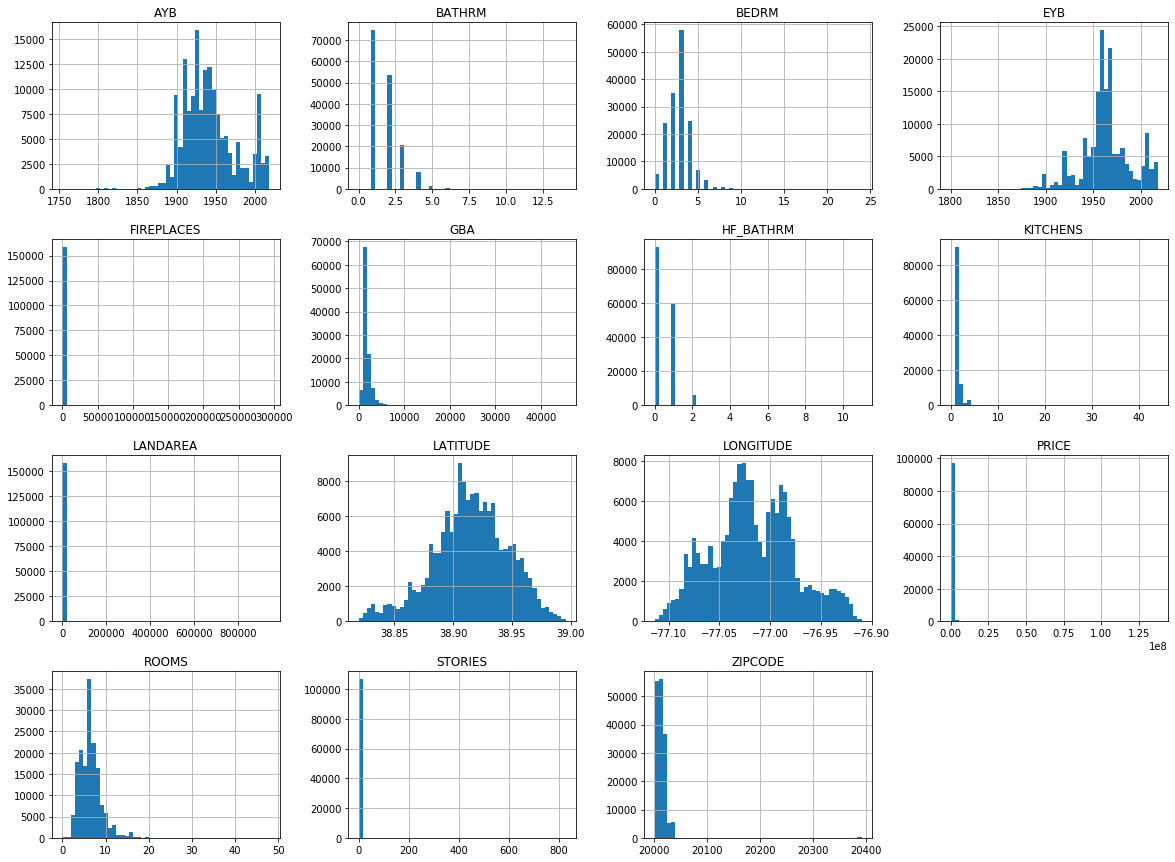

In [328]:
# plot within jupyter
%matplotlib inline 
import matplotlib.pyplot as plt

# plot histogram
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set

Next, before continuing discovering more about the dataset, lets create a test set to avoid data snooping bias. I will use Scikit-Learn's random test train split to create the sets:

In [329]:
from sklearn.model_selection import train_test_split

'''
first drop some instances with missing values
Since price is our label, and GBA is large correlation, we will handle missing data on them first.
'''
housing.dropna(subset=["PRICE"], inplace=True)
housing.dropna(subset=["GBA"], inplace=True)

# test set size of %20 of the data and random seed 42 <3
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

46320
11580


## Discover and Visualize the Data
Now we can gain more insights to our data. First lets create a copy of the training set so we don't damage it accidently:

In [330]:
housing = train_set.copy()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46320 entries, 26508 to 103749
Data columns (total 27 columns):
BATHRM             46320 non-null int64
HF_BATHRM          46320 non-null int64
HEAT               46320 non-null object
AC                 46320 non-null object
ROOMS              46320 non-null int64
BEDRM              46320 non-null int64
AYB                46241 non-null float64
EYB                46320 non-null int64
STORIES            46290 non-null float64
PRICE              46320 non-null float64
GBA                46320 non-null float64
STYLE              46320 non-null object
STRUCT             46320 non-null object
GRADE              46320 non-null object
CNDTN              46320 non-null object
EXTWALL            46320 non-null object
ROOF               46320 non-null object
INTWALL            46320 non-null object
KITCHENS           46319 non-null float64
FIREPLACES         46320 non-null int64
LANDAREA           46320 non-null int64
ZIPCODE            46320 no

Now lets try to visulize the data. First thing we can do is to plot the longitude and latitude as scatter plot:

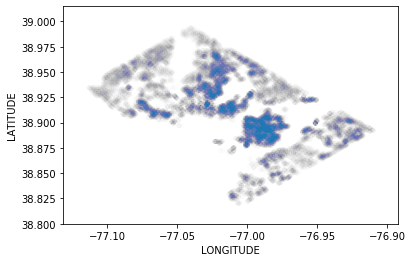

In [331]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.005)

This looks quite like D.C.. We can see the density of the Residential Properties. Lets try this with heat map to discover more patterns. Lets start with prices:

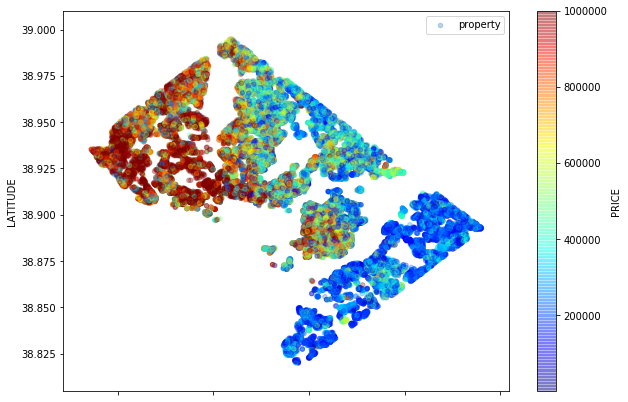

In [332]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
            label="property", figsize=(10,7),
            c="PRICE", cmap=plt.get_cmap("jet"), colorbar=True, vmax=1000000)
plt.legend()

There seems to be a pattern. We can see the more expensive neighborhoods Let's try to plot the heatmap on a DC map:

In [333]:
# we first need the min and max values for lat and long to modify the map image
print(housing["LATITUDE"].min())
print(housing["LATITUDE"].max())
print(housing["LONGITUDE"].min())
print(housing["LONGITUDE"].max())

38.81995335
38.99489423
-77.11390873
-76.90984266


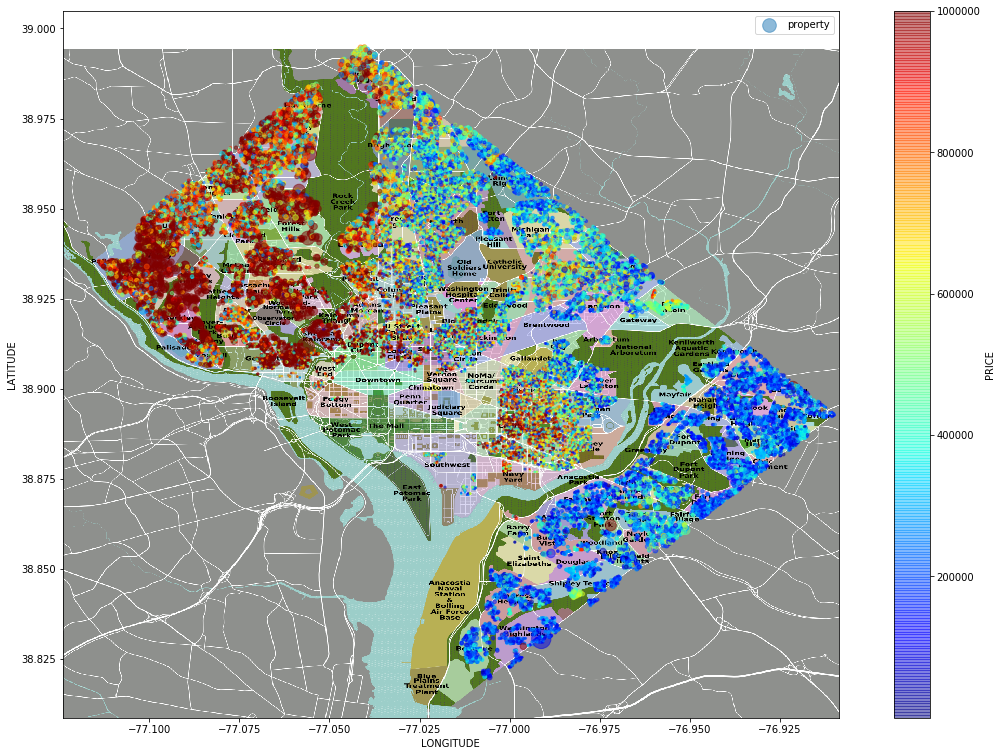

In [334]:
import urllib

#loading the png DC image found on Google
image=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/9/93/DC_neighborhoods_map.png')
dc_img=plt.imread(image)

#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(dc_img,zorder=0,extent=[-77.12390873, -76.90875796, 38.80873129, 38.9943352])
ax=plt.gca()

#using scatterplot
housing.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.5,
            label="property", figsize=(20,13),
            ax=ax,
            s=housing["LANDAREA"]/500,
            c="PRICE", cmap=plt.get_cmap("jet"), 
            colorbar=True, zorder=5, vmax=1000000)


plt.legend()
plt.show()

Here, color represents the residential price, and the radious of the circle represents the land area of the property.<br>
We can clearly see the more expensive residents, as well as the residents with bigger properties. It looks like right side of the map has cheaper residenses although they have bigger land areas. If we move to the left side, on the other hand, we see both the prices and the landarea are higher. As we go to the downtown, the landarea gets drastically smaller while the prices seems to stay high.
We can also see the landarea by itself:

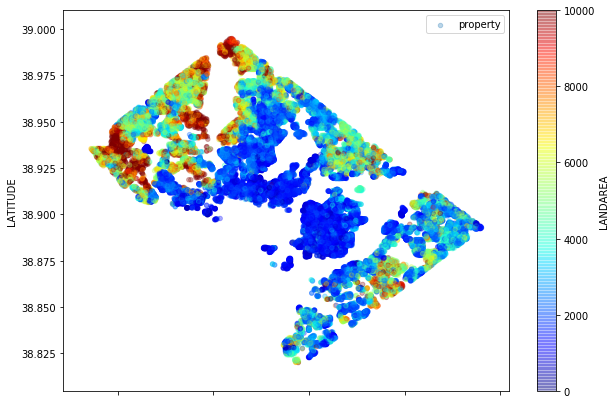

In [335]:
housing.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
            label="property", figsize=(10,7),
            c="LANDAREA", cmap=plt.get_cmap("jet"), colorbar=True, vmax=10000)
plt.legend()

The landarea also nearly follows the pricing. We can also clearly identify the downtown where the landarea is very low for residentials. 

## Looking for Correlations

In [336]:
corr_matrix = housing.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE         1.000000
GBA           0.593078
BATHRM        0.493054
FIREPLACES    0.478775
LANDAREA      0.370680
BEDRM         0.352467
ROOMS         0.334545
EYB           0.309790
HF_BATHRM     0.256021
LATITUDE      0.155887
KITCHENS      0.045783
STORIES       0.039951
AYB          -0.071947
ZIPCODE      -0.159698
LONGITUDE    -0.432901
Name: PRICE, dtype: float64

We can see that Gross Building Area Squre Feet, number of bathrooms, fireplaces, landarea, bedrooms, and rooms has a strong positive correlation with the price. On the other hand, zipcode and longitude has strong negative correlation with the price. Let's see this on a scatter plot:

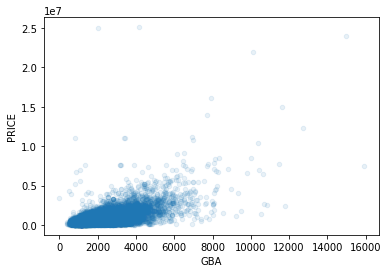

In [337]:
housing.plot(kind="scatter", x="GBA", y="PRICE", alpha=0.1)

### Lets Try Few Attribute Combinations

In [338]:
housing["bedrooms_per_room"]    = housing["BEDRM"] / housing["ROOMS"]
housing["bathrooms_per_room"]   = housing["BATHRM"] / housing["ROOMS"]
housing["rooms_per_stories"]    = housing["ROOMS"] / housing["STORIES"]
housing["kitchens_per_room"]    = housing["KITCHENS"] / housing["ROOMS"]
housing["kitchens_per_stories"] = housing["KITCHENS"] / housing["STORIES"]
housing["kitchens_per_gba"]     = housing["KITCHENS"] / housing["GBA"]
housing["gba_per_room"]         = housing["GBA"] / housing["ROOMS"]
housing["gba_per_stories"]      = housing["GBA"] / housing["STORIES"]

corr_matrix = housing.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE                   1.000000
GBA                     0.593078
BATHRM                  0.493054
FIREPLACES              0.478775
gba_per_stories         0.476803
gba_per_room            0.438721
LANDAREA                0.370680
BEDRM                   0.352467
ROOMS                   0.334545
bathrooms_per_room      0.318338
EYB                     0.309790
HF_BATHRM               0.256021
LATITUDE                0.155887
rooms_per_stories       0.137408
bedrooms_per_room       0.053318
KITCHENS                0.045783
STORIES                 0.039951
kitchens_per_stories   -0.046050
AYB                    -0.071947
kitchens_per_room      -0.140229
ZIPCODE                -0.159698
kitchens_per_gba       -0.297197
LONGITUDE              -0.432901
Name: PRICE, dtype: float64

Combination of the attributes gave us few better correlations between price and the attributes.

## Pre-processing

We are going to handle missing data, handle categorical data including "Zipcode".<br>Also, we need to handle the year attributes that wouldn't make sense at itself such as; AYB, EYB. 

AYB is "The earliest time the main portion of the building was built".<br>
EYB is "The year an improvement was built more recent than actual year built".

We will substract the current year from each instance for these attributes.

Categorical attributes that we will handle includes: ZIPCODE, HEAT, AC, STYLE, STRUCT, GRADE, CNDTN, EXTWALL, ROOF,  INTWALL, ASSESSMENT_NBHD, ASSESSMENT_SUBNBHD, WARD, QUADRANT

Start with clean dataset and, seperate the labels and predicators.

Substract the current year from AYB and EYB then look the corelations again:

In [339]:
housing["AYB"] = housing["AYB"].apply(lambda x: 2019 - x)
housing["EYB"] = housing["EYB"].apply(lambda x: 2019 - x)

corr_matrix = housing.corr()
corr_matrix["PRICE"].sort_values(ascending=False)

PRICE                   1.000000
GBA                     0.593078
BATHRM                  0.493054
FIREPLACES              0.478775
gba_per_stories         0.476803
gba_per_room            0.438721
LANDAREA                0.370680
BEDRM                   0.352467
ROOMS                   0.334545
bathrooms_per_room      0.318338
HF_BATHRM               0.256021
LATITUDE                0.155887
rooms_per_stories       0.137408
AYB                     0.071947
bedrooms_per_room       0.053318
KITCHENS                0.045783
STORIES                 0.039951
kitchens_per_stories   -0.046050
kitchens_per_room      -0.140229
ZIPCODE                -0.159698
kitchens_per_gba       -0.297197
EYB                    -0.309790
LONGITUDE              -0.432901
Name: PRICE, dtype: float64

This way we have a better meaning for the years as now they represent the age of the building, and how long it has been since last improvment. Now we an seperate our label from rest of the dataset:

In [340]:
# seperate labels and predicators
housing = train_set.drop("PRICE", axis=1)
housing_labels = train_set["PRICE"].copy()

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46320 entries, 26508 to 103749
Data columns (total 26 columns):
BATHRM             46320 non-null int64
HF_BATHRM          46320 non-null int64
HEAT               46320 non-null object
AC                 46320 non-null object
ROOMS              46320 non-null int64
BEDRM              46320 non-null int64
AYB                46241 non-null float64
EYB                46320 non-null int64
STORIES            46290 non-null float64
GBA                46320 non-null float64
STYLE              46320 non-null object
STRUCT             46320 non-null object
GRADE              46320 non-null object
CNDTN              46320 non-null object
EXTWALL            46320 non-null object
ROOF               46320 non-null object
INTWALL            46320 non-null object
KITCHENS           46319 non-null float64
FIREPLACES         46320 non-null int64
LANDAREA           46320 non-null int64
ZIPCODE            46320 non-null float64
LATITUDE           46320 no

### Setup Pipeline: Handle Missing Data, Standardize, and Handle Categorical Data
First, lets seperate categorical and numerical attributes:

In [341]:
# get the numerical values
housing_num = housing.drop(["HEAT","AC","STYLE","STRUCT","GRADE",
                            "CNDTN","EXTWALL","ROOF","INTWALL",
                            "ASSESSMENT_NBHD",
                            "WARD","QUADRANT","ZIPCODE"], axis=1)

# get categorical values
housing_cat = housing[["HEAT","AC","STYLE","STRUCT","GRADE",
                            "CNDTN","EXTWALL","ROOF","INTWALL",
                            "ASSESSMENT_NBHD",
                            "WARD","QUADRANT","ZIPCODE"]]

housing_cat.head(5)

,HEAT,AC,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,ASSESSMENT_NBHD,WARD,QUADRANT,ZIPCODE
26508,Warm Cool,Y,2.5 Story Fin,Single,Exceptional-A,Excellent,Stone Veneer,Slate,Hardwood,Spring Valley,Ward 3,NW,20016.0
87974,Forced Air,Y,2 Story,Single,Average,Good,Vinyl Siding,Comp Shingle,Hardwood,Deanwood,Ward 7,NE,20019.0
25573,Warm Cool,Y,3 Story,Row Inside,Very Good,Good,Common Brick,Comp Shingle,Hardwood,Kent,Ward 3,NW,20016.0
26279,Warm Cool,Y,2.5 Story Fin,Single,Superior,Good,Wood Siding,Comp Shingle,Hardwood,Palisades,Ward 3,NW,20016.0
58475,Hot Water Rad,N,3 Story,Row Inside,Average,Average,Common Brick,Metal- Sms,Hardwood,Petworth,Ward 4,NW,20011.0


Let's handle values with 0 so that we won't get the devision by zero error:

In [342]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# numerical values pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# categorical values pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder()),
])

# get attributes
num_attribs = list(housing_num)
cat_attribs = ["HEAT","AC","STYLE","STRUCT","GRADE",
                            "CNDTN","EXTWALL","ROOF","INTWALL",
                            "ASSESSMENT_NBHD",
                            "WARD","QUADRANT","ZIPCODE"]

# full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# prepare the data
housing_prepared = full_pipeline.fit_transform(housing)

Above pipeline will handle missing values for numerical value by replacing them by median, then it will standardize the values to match across our dataset. Next it will also handle missing values in categorical attributes. It will replace them with most frequent apperance for that attribute. Finally, it will handle categorical data with OneHotEncoding. 

## Train Models and Evaluate on the Training Set
Let's first write a small function to print predictions with actual labels:

In [435]:
def prediction_test(model):
    some_data = housing.iloc[:5] # Purely integer-location based indexing for selection by position
    some_labels = housing_labels.iloc[:5]
    some_data_prepared = full_pipeline.transform(some_data)
    
    predictions = model.predict(some_data_prepared)
    some_labels = list(some_labels)
    
    print("Predictions\t", "Actual\t\t", "Difference %")
    for index in range(len(predictions)):
        diff = (abs(predictions[index] - some_labels[index]) / some_labels[index]) * 100.0
        print('${:,.2f}'.format(predictions[index]), "\t", 
              '${:,.2f}'.format(some_labels[index]), "\t", 
              "%.2f" % diff)

### Linear Regression Model
First, lets train a Linear Regression Model

In [436]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Measure the RMSE on the training set to see the error:

In [437]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

368944.6039943739

It looks like we are off by 368,944. Not too bad given the prices are very high in D.C.. But we should definetly try to see if we can use more complex models to improve this. Let's try to print some predictions:

In [439]:
prediction_test(lin_reg)

Predictions	 Actual		 Difference %
$3,482,281.79 	 $4,000,000.00 	 12.94
$345,968.53 	 $362,000.00 	 4.43
$585,862.32 	 $332,000.00 	 76.46
$1,712,063.67 	 $1,537,892.00 	 11.33
$184,060.68 	 $355,000.00 	 48.15


### Decision Tree Model
Let's see if we will do better with Decision Tree:

In [440]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels) # train

# evaluate
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

67.63380549545732

This is is very good; however, later we will use cross validation to see if we are overfitting our training set. Let's do some predictions.

In [443]:
prediction_test(tree_reg)

Predictions	 Actual		 Difference %
$4,000,000.00 	 $4,000,000.00 	 0.00
$362,000.00 	 $362,000.00 	 0.00
$332,000.00 	 $332,000.00 	 0.00
$1,537,892.00 	 $1,537,892.00 	 0.00
$355,000.00 	 $355,000.00 	 0.00


This is too good! 0% error. We are definitely overfitting the training set with this model. Let's move on to another model.

### Random Forest Model
Let's also try random forest:

In [444]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

137566.8765344076

This is also very good. We are only off by 136,774; however, we should check later if we are overfitting by doing cross-validation. Let's do some predictions:

In [445]:
prediction_test(forest_reg)

Predictions	 Actual		 Difference %
$3,673,440.00 	 $4,000,000.00 	 8.16
$323,845.74 	 $362,000.00 	 10.54
$496,813.00 	 $332,000.00 	 49.64
$1,683,628.54 	 $1,537,892.00 	 9.48
$334,599.50 	 $355,000.00 	 5.75


## Cross Validation
Let's see if we are overfitting our training set:

In [149]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [677805.00374856 436975.28872271 561415.96483067 466443.11008418
 437386.2894304  402916.68545434 530782.82497177 510567.80996226
 643745.32927305 595726.21384537]
Mean: 526376.4520323321
Standard deviation: 88180.88359076034


It looks like we were overfitting decision tree model by alot that it performed worse than the linear regression model. Let's test linear regression model to make sure:

In [185]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [306526.05106483 324955.43799466 393872.8370309  384535.1496665
 378896.28854537 325326.71664603 341755.53260091 396166.86022384
 436871.82814674 516854.90108284]
Mean: 380576.1603002618
Standard deviation: 59427.34227299525


Yes, we were overfitting the decision tree model a lot that it performed worse than the linear regression. Now let's see the random forest model:

In [ ]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)